In [2]:
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors as mcolors
import os
from datetime import datetime
import bisect 
import re
import numpy as np

In [3]:
#CONSTANTS 
COLORS = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [6]:
# data:  {'[[ENTITY]]':{'x':[[ARR_OF_VALS]], 'y':[[ARR_OF_VALS]] }} 
#OPTIONAL# opt: {'color': [[HEX_VAL]], 'width': [[NUMBER]]} 
#OPTIONAL# logit: False, True
def plotLines(data,opt = {}, logit= False):
    
    for d in data:
        
        #def color
        my_color = None
        if 'color' in opt:
            if d in opt['color']:
                my_color = opt['color'][d]

        #def width
        my_width = None
        if 'width' in opt:
            if d in opt['width']:
                my_width = opt['width'][d]
                            
        plt.plot(data[d]['x'],data[d]['y'], label=d, color=my_color, linewidth=my_width)
        if logit:
            plt.yscale('log')
        plt.xticks(data[d]['x'],[item.strftime('%Y-%m') for item in data[d]['x']])
    
    return plt

In [7]:
# data:  {'[[ENTITY]]':{'x':[[ARR_OF_VALS]], 'y':[[ARR_OF_VALS]] }} 
#OPTIONAL# opt: {'color': [[HEX_VAL]], 'multi': [[False, True]], 'width': [[NUMBER]]} 
#OPTIONAL# logit: False, True
def plotBars(data,opt = {}, logit= False):
    
    x_groups = []
    bars_groups = []
    bars_legend = []
    
    for d_bar in data:
            bars_legend.append(d_bar)
            d = data[d_bar]
            
            #the x axis
            for index_x in range(0,len(d['x'])):
                x_val = d['x'][index_x]
                if x_val not in x_groups:
                    bisect.insort(x_groups, x_val)
                    bars_groups.append([])
                
                index_in_groups = x_groups.index(x_val)
                #insert same y val
                bars_groups[index_in_groups].append(d['y'][index_x])
        
    
    ind = np.arange(len(x_groups))    # the x locations for the groups
    width = 0.3     # the width of the bars: can also be len(x) sequence   
    if 'width' in opt:
        width = opt['width']
    fig, ax = plt.subplots()

    
    #for each x tick set all the bars
    loop_width = width/len(bars_legend) 
    starting_from = ind - loop_width
    for bl_index in range(0,len(bars_legend)):
        y_vals = []
        for g in bars_groups:
            y_vals.append(g[bl_index])
    
        my_color = None
        if 'color' in opt:
            if bars_legend[bl_index] in opt['color']:
                my_color = opt['color'][bars_legend[bl_index]]
                
        rects1 = ax.bar(starting_from, tuple(y_vals), width, color=my_color, label= bars_legend[bl_index])
        
        if 'multi' in opt:
            if opt['multi'] == True:
                if ((bl_index & 1) == 1):
                        starting_from = starting_from + 2*loop_width 
        else:
            starting_from = starting_from + 2*loop_width 
                
        
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xticks(ind)
    #x_groups = [item.strftime('%Y-%m') for item in x_groups]
    ax.set_xticklabels(tuple(x_groups))
    ax.legend()
    

    return plt
    #return plt

In [ ]:
# ------------------------------------------------------------------
# EXAMPLE (Convert it to code)

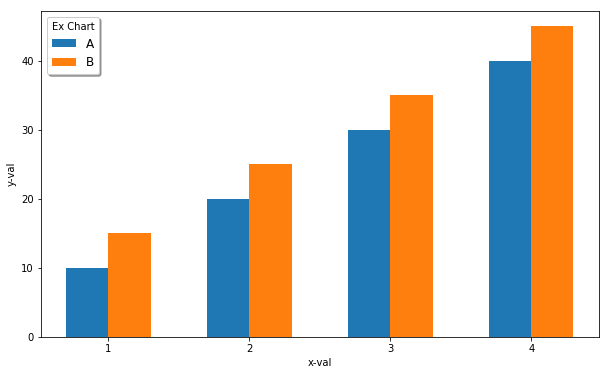

In [11]:
ex_data = {
    'A': {'x': ['1','2','3','4'], 'y': [10,20,30,40] },
    'B': {'x': ['1','2','3','4'], 'y': [15,25,35,45] }
}
ex_opt = {
    'multi': True
}

my_plt = plotBars(ex_data)
my_plt.legend(loc='upper left', shadow=True, fontsize='large', title='Ex Chart')
my_plt.ylabel('y-val')
my_plt.xlabel('x-val')
my_plt.rcParams['figure.figsize'] = (10,6)
my_plt.show()

In [ ]:
# ------------------------------------------------------------------